<a href="https://colab.research.google.com/github/Aliouisef/firth-repo/blob/main/MAKALOU_ANSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install skimpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import skimpy as sk

In [4]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ int64       │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID               │   0 │     0 │  100.5 │  57.88 │   1 │  50.75 │  100.5 │  150.2 │   200 │ ▇▇▇▇▇▇ │  │
│ │ Age                      │   0 │     0 │  38.85 │  13.97 │  18 │  28.75 │     36 │     49 │    70 │ ▆▇▅▅▃▂ │  │
│ │ Annual Income (k$)       │   0 │     0 │  60.56 │  26.26 │  15 │   41.5 │   61.5 │     78 │   137 │ ▅▇▇▅▂▁ │  │
│ │ Spending Score (1-100)   │   0 │     0 │   50.2 │  25.82 │   1 │  34.75 │     50 │     73 │    99 │ ▅▃▇▇▅▅ │  │
│ └──────────────────────────┴─────┴───────┴────────┴────────┴─────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Genre                     │       0 │          0 │                            1 │                      200 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

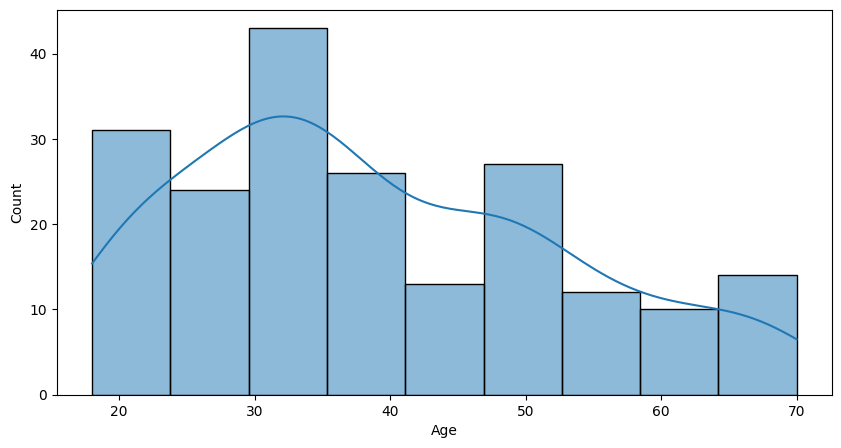

In [6]:
# Distribution des variables quantitatives
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True)
#sns.histplot(df['Annual Income (k$)'], kde=True)
#sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.show()

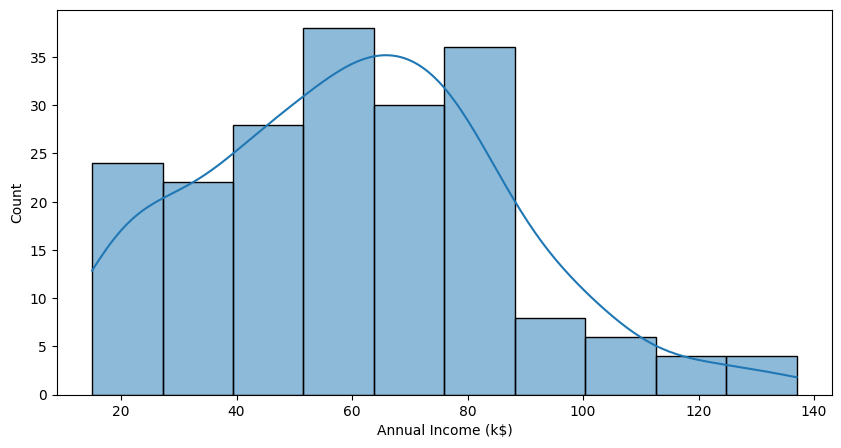

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Annual Income (k$)'], kde=True)
#sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.show()

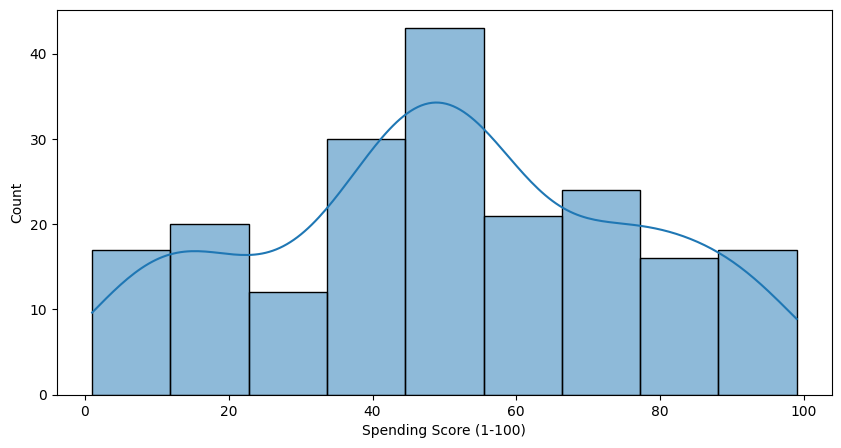

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.show()

### Normalisation des variables continues

Les histogrammes montrent que les variables continues ne sont pas normalement distribués. Pour pallier à ce problème nous décidons de normaliser ces variables afin de centré leur distribution autour de 0 et d'éliminer les biais de mesure.

In [9]:

data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [10]:
data_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

### Utilisation de la méthode du coude

Elle est souvent utilisée pour obtenir le nombre optimal de clusters pour un probléme de clustering modélisé par algorithme du K-means. Elle consiste à tracer l'inertie (ou somme des carrés des distances intra-cluster) pour différents nombres de clusters
𝐾
K et à repérer le "coude" où l'ajout de clusters supplémentaires n'apporte plus de réduction significative de l'inertie.

In [11]:
# Méthode du coude pour déterminer le nombre optimal de clusters
inertie = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertie.append(kmeans.inertia_)

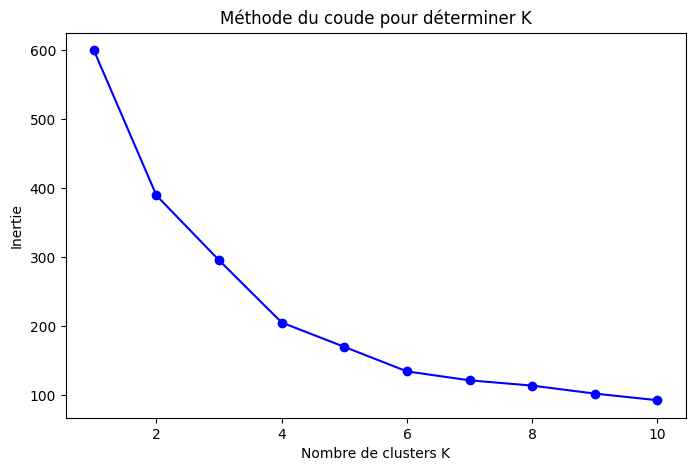

In [12]:
# Visualisation de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(K, inertie, 'bo-')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer K')
plt.show()

Visiblement, le nombre de cluster optimal est 4.

### Entrainement du modéle de K-means

K-means est un algorithme de clustering qui regroupe les données en k clusters.

Chaque point de donnée est affecté au cluster dont le centre lui est le plus proche, et les centres sont ajustés pour minimiser la variance intra-cluster.




In [13]:

kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

In [17]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,PCA1,PCA2
0,1,Male,19,15,39,2,-0.615720,-1.763481
1,2,Male,21,15,81,2,-1.665793,-1.820747
2,3,Female,20,16,6,2,0.337862,-1.674799
3,4,Female,23,16,77,2,-1.456573,-1.772430
4,5,Female,31,17,40,2,-0.038465,-1.662740


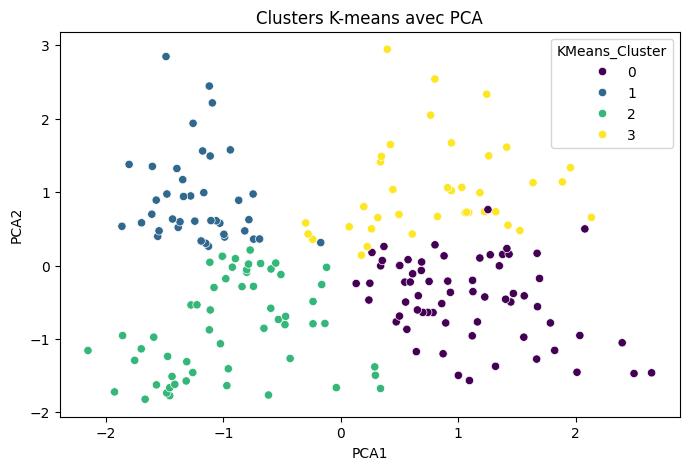

In [14]:
# Réduction de dimension avec PCA pour visualisation en 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df['PCA1'] = data_pca[:, 0]
df['PCA2'] = data_pca[:, 1]

# Visualisation pour K-means
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('Clusters K-means avec PCA')
plt.show()

### **Profilage des clusters **



In [15]:
# Select only numeric columns for calculating the mean
numeric_cols = df.select_dtypes(include=np.number).columns
cluster_profiles = df.groupby('KMeans_Cluster')[numeric_cols].mean()
cluster_profiles.drop("CustomerID",axis=1,inplace =True)

In [16]:
cluster_profiles = cluster_profiles[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
cluster_profiles

,Age,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


Le tableau ci-dessus montre le profile des individus appartenant les clusters.

- les individus du cluster O ont en moyenne 53 ans, un revenu annuel de 47.707692	$ et un Spending Score (1-100) de 39.969231.

- les individus du cluster 1 ont en moyenne 32 ans, un revenu annuel de 86.100000	$ et un Spending Score (1-100) de 81.525000.

- les individus du cluster 2 ont en moyenne 25 ans, un revenu annuel de 40.000000	$ et un Spending Score (1-100) de 60.298246.

- les individus du cluster 2 ont en moyenne 39 ans, un revenu annuel de 86.500000$ et un Spending Score (1-100) de 19.578947.

### Evaluation de l'algorithme


In [ ]:
# Score de silhouette pour K-means
kmeans_silhouette = silhouette_score(data_scaled, df['KMeans_Cluster'])
print(f"Score de silhouette pour K-means: {kmeans_silhouette:.2f}")


Score de silhouette pour K-means: 0.40


L'indice de silhouette (0,40) associé à notre modèle est plus proche de 1 que de -1.

Notre modéle parvient à partitionner bien nos données.

### Classification Hierarchique Ascendente

Il existe de nombreuses techniques statistiques visant à partitionner une population en différentes classes. La classification ascendante hiérarchique (CAH) est une d’entre elles. On cherche à ce que les individus regroupés au sein d’une même classe soient le plus semblables (homogénéité intra-classe) possibles et que les classes soient le plus dissemblables (hétérogénéité inter-classe).
Le principe de la CAH est de rassembler des individus selon un critère de ressemblance défini au préalable qui s’exprimera sous la forme d’une matrice de distances, exprimant la distance existante entre les individus pris deux à deux. Deux observations identiques auront une distance nulle. Plus les observations seront dissemblables, plus leur distance sera importante. La CAH va ensuite rassembler les individus de manière itérative afin de produire un dendrogramme ou arbre de classification.

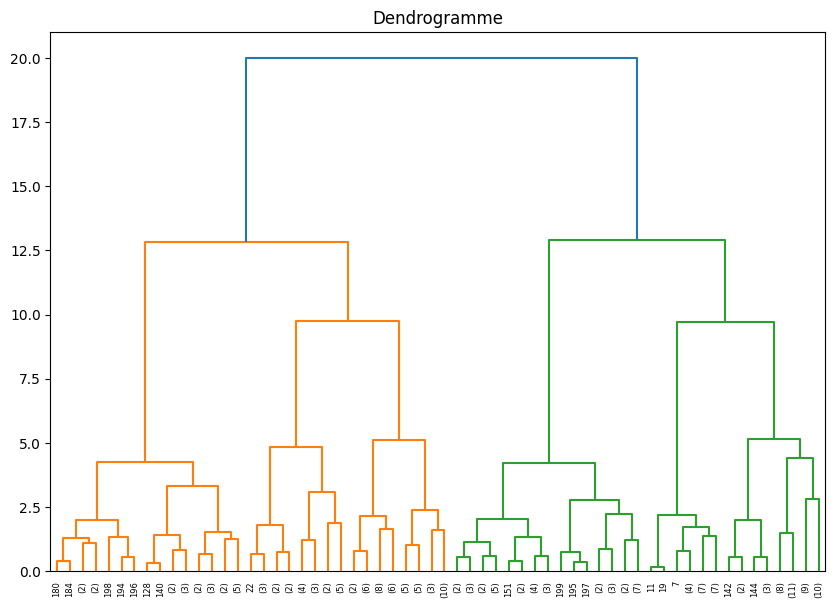

In [18]:
# Calcul et affichage du dendrogramme
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogramme')
plt.show()


hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['HC_Cluster'] = hc.fit_predict(data_scaled)

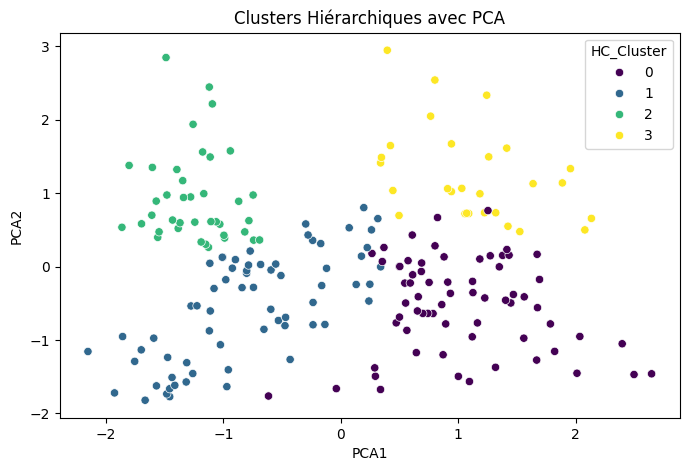

In [19]:
# Visualisation pour Clustering Hiérarchique
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='HC_Cluster', data=df, palette='viridis')
plt.title('Clusters Hiérarchiques avec PCA')
plt.show()

In [ ]:
# Select only numeric columns for calculating the mean
numeric_cols = df.select_dtypes(include=np.number).columns
cluster_profiles_HC = df.groupby('HC_Cluster')[numeric_cols].mean()
cluster_profiles_HC.drop("CustomerID",axis=1,inplace =True)

In [ ]:
cluster_profiles_HC = cluster_profiles_HC[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [ ]:
cluster_profiles_HC

,Age,Annual Income (k$),Spending Score (1-100)
HC_Cluster,,,
0,52.432836,45.597015,39.134328
1,26.560606,47.363636,56.787879
2,32.692308,86.538462,82.128205
3,43.892857,91.285714,16.678571


In [ ]:
# Score de silhouette pour clustering hiérarchique
hc_silhouette = silhouette_score(data_scaled, df['HC_Cluster'])
print(f"Score de silhouette pour clustering hiérarchique: {hc_silhouette:.2f}")

Score de silhouette pour clustering hiérarchique: 0.36


In [ ]:
# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

# Vérification des clusters et des points de bruit
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
-1    60
 2    51
 4    32
 3    28
 0    17
 5     7
 1     5
Name: count, dtype: int64


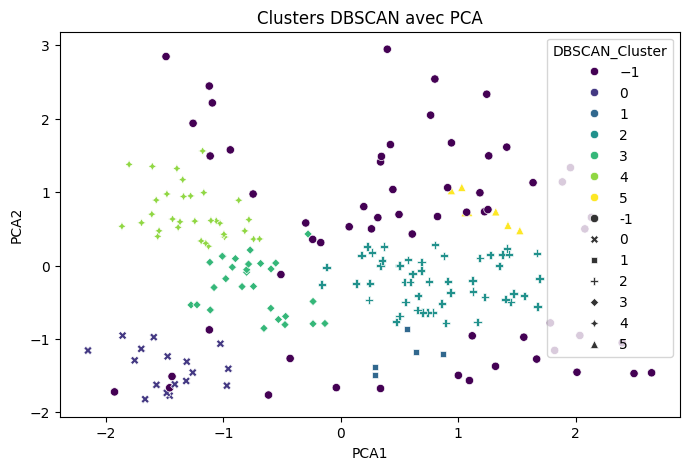

In [ ]:
# Visualisation pour DBSCAN
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df, palette='viridis', style='DBSCAN_Cluster')
plt.title('Clusters DBSCAN avec PCA')
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
cluster_profiles_dbscan = df.groupby('DBSCAN_Cluster')[numeric_cols].mean()
cluster_profiles_dbscan.drop("CustomerID",axis=1,inplace =True)
cluster_profiles_dbscan = cluster_profiles_dbscan[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
cluster_profiles_dbscan

,Age,Annual Income (k$),Spending Score (1-100)
DBSCAN_Cluster,,,
-1,40.133333,68.533333,31.533333
0,23.764706,25.823529,78.176471
1,38.200000,27.800000,31.800000
2,53.666667,54.156863,48.411765
3,24.107143,54.321429,50.464286
4,32.750000,80.875000,83.625000
5,43.857143,78.714286,14.571429


In [ ]:
# Score de silhouette pour DBSCAN (ignore les points de bruit)
dbscan_silhouette = silhouette_score(data_scaled[df['DBSCAN_Cluster'] != -1], df['DBSCAN_Cluster'][df['DBSCAN_Cluster'] != -1])
print(f"Score de silhouette pour DBSCAN: {dbscan_silhouette:.2f}")


Score de silhouette pour DBSCAN: 0.48
